In [116]:
import pandas as pd

In [117]:
import numpy as np

In [118]:
import matplotlib.pyplot as plt

In [119]:
import seaborn as sns

In [120]:
df = pd.read_csv("insurance.csv")

In [121]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [123]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [124]:
df["age"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: age, Length: 1338, dtype: bool

In [125]:
df["age"].nunique()

47

In [126]:
df["sex"].nunique()


2

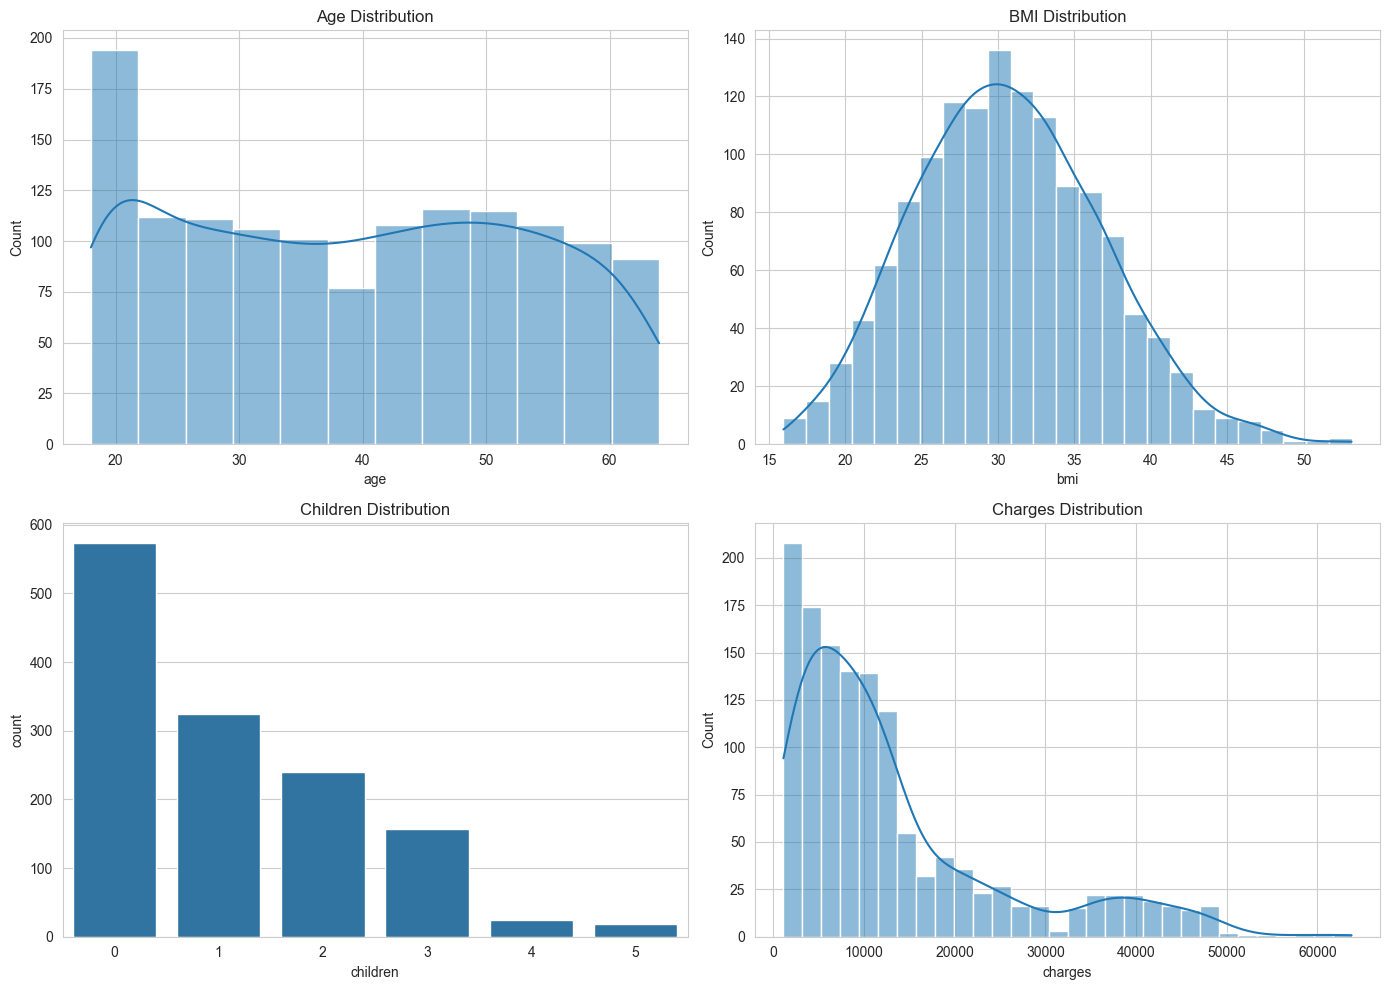

In [127]:
sns.set_style("whitegrid")

# Plot distributions for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['age'], kde=True, ax=axes[0, 0]).set(title='Age Distribution')
sns.histplot(df['bmi'], kde=True, ax=axes[0, 1]).set(title='BMI Distribution')
sns.countplot(x='children', data=df, ax=axes[1, 0]).set(title='Children Distribution')
sns.histplot(df['charges'], kde=True, ax=axes[1, 1]).set(title='Charges Distribution')

plt.tight_layout()
plt.show()

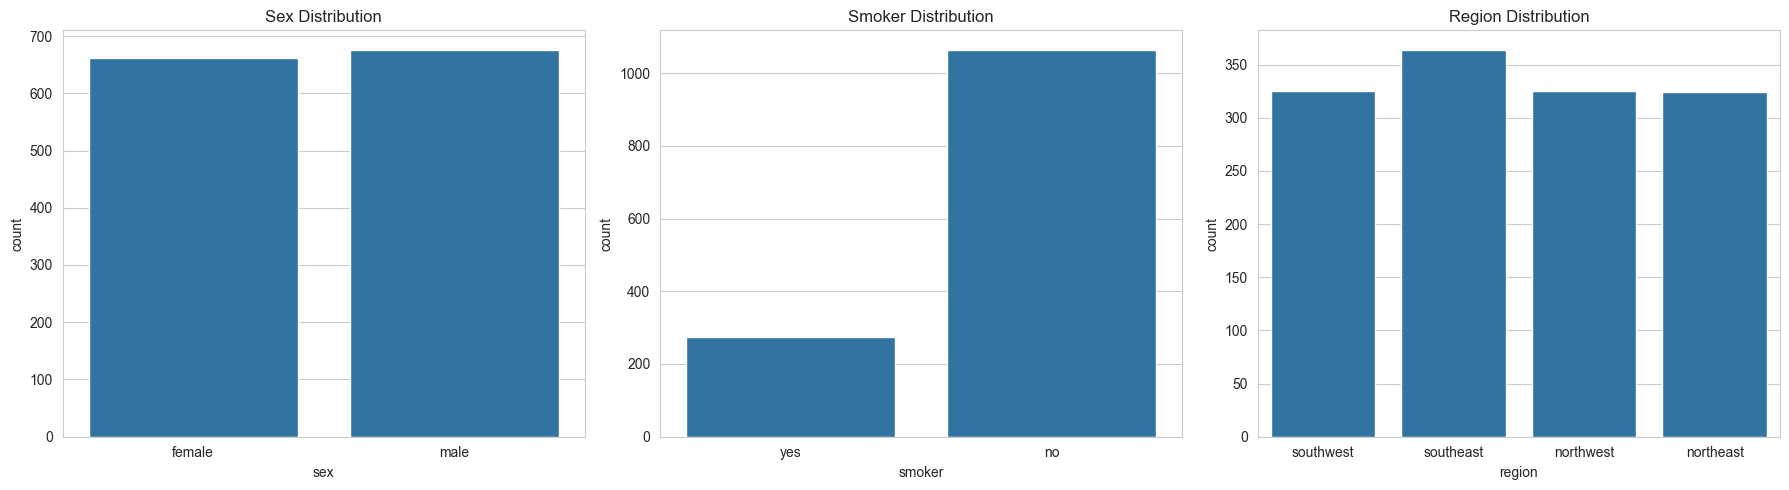

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='sex', data=df, ax=axes[0]).set(title='Sex Distribution')
sns.countplot(x='smoker', data=df, ax=axes[1]).set(title='Smoker Distribution')
sns.countplot(x='region', data=df, ax=axes[2]).set(title='Region Distribution')

plt.tight_layout()
plt.show()

In [129]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor


In [130]:
X = df.drop('charges', axis=1)
Y = df['charges']

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [139]:
# Identify categorical and numerical columns
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [140]:
# Define the model
model = LinearRegression()

# Create and bundle the preprocessing and model in a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [141]:
pipeline.fit(X_train, Y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

In [143]:
# Make predictions
Y_pred = pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 33596915.85136147
R^2 Score: 0.7835929767120723


In [148]:
# Split the data into features and target
X = df.drop('charges', axis=1)
Y = df['charges']

# Splitting into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# If categorical data is present, one-hot encode them (example with pandas)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure train and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Create and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, Y_train)

# Make predictions
train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

# Evaluate the model
train_r2 = r2_score(Y_train, train_predictions)
test_r2 = r2_score(Y_test, test_predictions)
train_mse = mean_squared_error(Y_train, train_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)

print("Train R² Score:", train_r2)
print("Test R² Score:", test_r2)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)


Train R² Score: 0.9983078124756305
Test R² Score: 0.7553500495404961
Train Mean Squared Error: 244239.5543823394
Test Mean Squared Error: 37981594.4683632


In [149]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Create preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and a Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, Y_train)

# Predict and evaluate on train and test data
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

train_r2 = r2_score(Y_train, train_predictions)
test_r2 = r2_score(Y_test, test_predictions)

train_mse = mean_squared_error(Y_train, train_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)

print("Train R² Score:", train_r2)
print("Test R² Score:", test_r2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train R² Score: 0.9749626952357883
Test R² Score: 0.8647097634425496
Train MSE: 3613724.8800627324
Test MSE: 21003637.60876614


In [154]:
from xgboost import XGBRegressor

In [155]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])


In [157]:
pipeline.fit(X_train, Y_train)

# Predict and evaluate on train and test data
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

train_r2 = r2_score(Y_train, train_predictions)
test_r2 = r2_score(Y_test, test_predictions)

train_rmse = np.sqrt(mean_squared_error(Y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predictions))

print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train R²: 0.9945325247556726
Test R²: 0.8553648660539922
Train RMSE: 888.3358063500559
Test RMSE: 4738.609614038749
